<a href="https://colab.research.google.com/github/joyy2002/Parameter_Optimization_102117024/blob/main/Parameter_Optimisation_102117024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd

data_path = "/content/dataset.csv"
dataset = pd.read_csv(data_path)

dataset

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,0,82,9,59,56,34,41,0,10,30,3,67,42,96,100,100,5
7490,49,100,0,70,24,56,100,65,86,85,44,77,21,38,6,0,4
7491,100,98,60,100,24,87,3,58,35,51,58,26,36,0,0,5,5
7492,59,65,91,100,84,96,72,50,51,8,0,0,45,1,100,0,1


###Importing Necessary Libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [22]:
dataset.shape

(7494, 17)

In [ ]:
dataset.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [23]:
X = dataset.iloc[:,0:-1]
y = dataset['Class']

In [24]:
ss = StandardScaler()
ss.fit_transform(X)

array([[ 0.28858794,  0.90938369, -0.49537096, ...,  1.63145551,
        -0.16407123,  1.93904289],
       [-1.12198472,  0.25645994, -0.49537096, ..., -1.01743997,
         1.28070152, -0.63016481],
       [-1.12198472, -1.64295463, -0.34301481, ..., -0.32511502,
        -0.74198032, -0.79772183],
       ...,
       [ 1.8792337 ,  0.79067028,  0.76156728, ..., -1.07764214,
        -1.12725306, -0.65809098],
       [ 0.64873415, -1.16810099,  1.94232745, ..., -1.04754106,
         1.28070152, -0.79772183],
       [-1.12198472, -0.39646382, -0.41919288, ...,  0.00599692,
         1.28070152,  0.31932499]])

###Creation of 10 samples with 70-30 ratio of Training and Testing Set

In [25]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [26]:
samples

[(      Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
  1511           0          88          52         100         100          77   
  2014           0          94          44         100          80          86   
  5639          15          77          27         100          90          87   
  2570         100         100          67          99          26          68   
  6466          66         100          39          86          11          64   
  ...          ...         ...         ...         ...         ...         ...   
  4931          12          73          22         100          72          80   
  3264           0         100          15          95           1          63   
  1653          11          82           6          41          28           0   
  2607          44          56          99          74         100         100   
  2732         100         100          57          78          29          51   
  
        Attri

### Creation of a Fitness Function

In [27]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [28]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=100)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

### Calling the Function for Every Sample

In [29]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  8.36 Best Epsilon =  5.66
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  2.63 Best Epsilon =  2.83
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  9.74 Best Epsilon =  0.1
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  1.88 Best Epsilon =  4.34
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  4.33 Best Epsilon =  9.29
Best Accuracy =  1.0 Best Kernel =  poly Best Nu =  9.35 Best Epsilon =  6.77
Best Accuracy =  1.0 Best Kernel =  poly Best Nu =  4.45 Best Epsilon =  0.41
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  2.85 Best Epsilon =  2.64
Best Accuracy =  0.99 Best Kernel =  poly Best Nu =  5.74 Best Epsilon =  2.36
Best Accuracy =  1.0 Best Kernel =  poly Best Nu =  2.35 Best Epsilon =  8.17


###Creation of a Result Table

In [30]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.99,poly,8.36,5.66
1,2,0.99,poly,2.63,2.83
2,3,0.99,poly,9.74,0.10
3,4,0.99,poly,1.88,4.34
4,5,0.99,poly,4.33,9.29
5,6,1.00,poly,9.35,6.77
6,7,1.00,poly,4.45,0.41
7,8,0.99,poly,2.85,2.64
8,9,0.99,poly,5.74,2.36
9,10,1.00,poly,2.35,8.17


### Plotting of the Convergence Graph/Linear Curve

In [31]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [32]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()],
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 100), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [33]:
train_sizes

array([  47,  142,  237,  333,  428,  524,  619,  714,  810,  905, 1000,
       1096, 1191, 1286, 1382, 1477, 1573, 1668, 1763, 1859, 1954, 2049,
       2145, 2240, 2335, 2431, 2526, 2622, 2717, 2812, 2908, 3003, 3098,
       3194, 3289, 3384, 3480, 3575, 3671, 3766, 3861, 3957, 4052, 4147,
       4243, 4338, 4433, 4529, 4624, 4720])

In [34]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

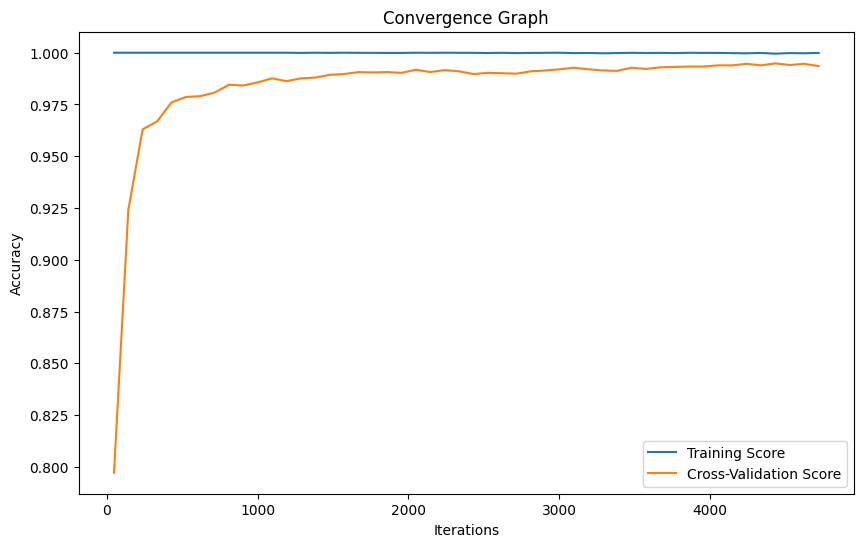

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()